# Option Greeks Demonstration

In this notebook, we demonstrate how to compute **option Greeks** — 
the sensitivities of option prices to various parameters — using the 
functions implemented in our `src.greeks` module.

We will cover:

- **Delta (Δ):** sensitivity to underlying asset price:  

    $ \Delta = \frac{\partial V}{\partial S} $

- **Gamma (Γ):** sensitivity of Delta to asset price:  

    $ \Gamma = \frac{\partial^2 V}{\partial S^2} $

- **Vega (ν):** sensitivity to volatility:  

    $ \text{Vega} = \frac{\partial V}{\partial \sigma} $

- **Theta (Θ):** sensitivity to time to maturity:  

    $ \Theta = \frac{\partial V}{\partial T} $

- **Rho (ρ):** sensitivity to interest rate:

    $ \rho = \frac{\partial V}{\partial r} $

These are crucial for **risk management** and **hedging strategies**.


In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman" # Set font to Times New Roman
import sys
import os
# Add the repo root (one level up from notebooks) to Python path
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(repo_root)
# Import the package
from src.black_scholes import black_scholes_price
from src.greeks import (
    delta,
    gamma,
    vega,
    theta,
    rho
)


## Parameters
We set up a standard European option:


In [2]:
S0 = 100     # spot price
K = 100      # strike
T = 1.0      # time to maturity (in years)
r = 0.05     # risk-free interest rate
sigma = 0.2  # volatility


## Compute Greeks at Initial Parameters
We start by evaluating Greeks for a call and put option at $( S_0 = 100 )$.


In [3]:
call_delta = delta(S0, K, T, r, sigma, option_type='call')
put_delta  = delta(S0, K, T, r, sigma, option_type='put')

g = gamma(S0, K, T, r, sigma)
v = vega(S0, K, T, r, sigma)

call_theta = theta(S0, K, T, r, sigma, option_type='call')
put_theta  = theta(S0, K, T, r, sigma, option_type='put')

call_rho = rho(S0, K, T, r, sigma, option_type='call')
put_rho  = rho(S0, K, T, r, sigma, option_type='put')

print(f"Delta (Call): {call_delta:.4f}, Delta (Put): {put_delta:.4f}")
print(f"Gamma: {g:.4f}, Vega: {v:.4f}")
print(f"Theta (Call): {call_theta:.4f}, Theta (Put): {put_theta:.4f}")
print(f"Rho (Call): {call_rho:.4f}, Rho (Put): {put_rho:.4f}")


Delta (Call): 0.6368, Delta (Put): -0.3632
Gamma: 0.0188, Vega: 37.5240
Theta (Call): -6.4140, Theta (Put): -1.6579
Rho (Call): 53.2325, Rho (Put): -41.8905


## Sensitivity Curves
Now, we visualize how the Greeks change with the underlying stock price.


In [4]:
S_range = np.linspace(50, 150, 200)

call_deltas = [delta(S, K, T, r, sigma, option_type='call') for S in S_range]
put_deltas  = [delta(S, K, T, r, sigma, option_type='put') for S in S_range]
gammas      = [gamma(S, K, T, r, sigma) for S in S_range]
vegas       = [vega(S, K, T, r, sigma) for S in S_range]


### Delta


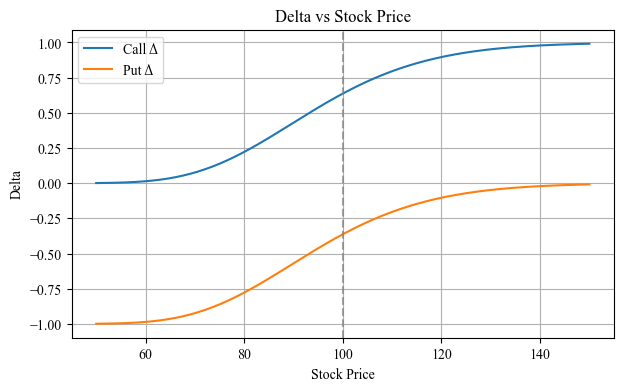

In [5]:
plt.figure(figsize=(7,4))
plt.plot(S_range, call_deltas, label="Call Δ")
plt.plot(S_range, put_deltas, label="Put Δ")
plt.axvline(K, color='gray', linestyle='--', alpha=0.7)
plt.title("Delta vs Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Delta")
plt.legend()
plt.grid(True)
plt.show()


### Gamma


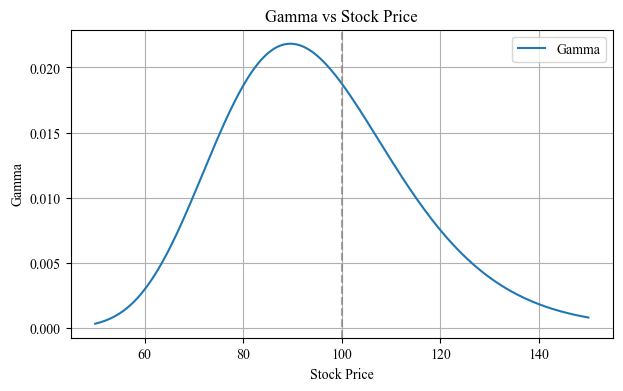

In [6]:
plt.figure(figsize=(7,4))
plt.plot(S_range, gammas, label="Gamma")
plt.axvline(K, color='gray', linestyle='--', alpha=0.7)
plt.title("Gamma vs Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Gamma")
plt.legend()
plt.grid(True)
plt.show()


### Vega


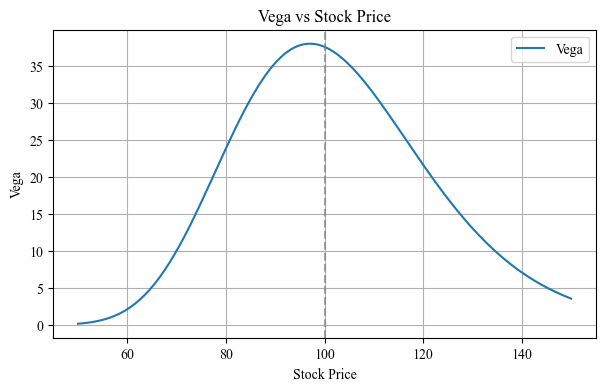

In [7]:
plt.figure(figsize=(7,4))
plt.plot(S_range, vegas, label="Vega")
plt.axvline(K, color='gray', linestyle='--', alpha=0.7)
plt.title("Vega vs Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Vega")
plt.legend()
plt.grid(True)
plt.show()


### Theta


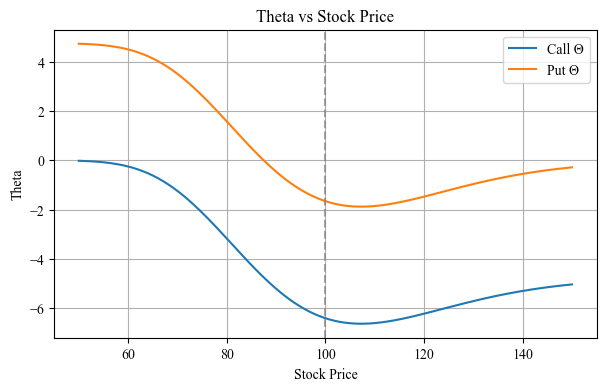

In [8]:
call_thetas = [theta(S, K, T, r, sigma, option_type='call') for S in S_range]
put_thetas  = [theta(S, K, T, r, sigma, option_type='put') for S in S_range]

plt.figure(figsize=(7,4))
plt.plot(S_range, call_thetas, label="Call Θ")
plt.plot(S_range, put_thetas, label="Put Θ")
plt.axvline(K, color='gray', linestyle='--', alpha=0.7)
plt.title("Theta vs Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Theta")
plt.legend()
plt.grid(True)
plt.show()


### Rho


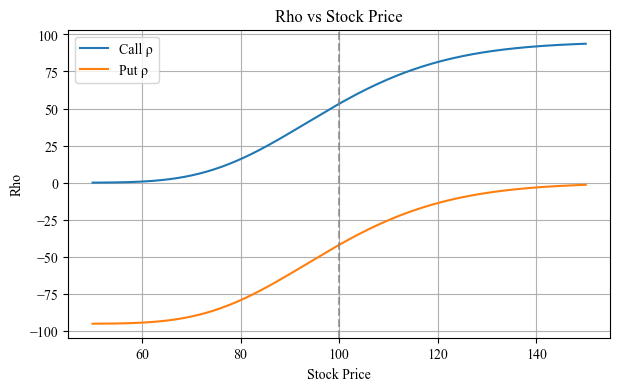

In [9]:
call_rhos = [rho(S, K, T, r, sigma, option_type='call') for S in S_range]
put_rhos  = [rho(S, K, T, r, sigma, option_type='put') for S in S_range]

plt.figure(figsize=(7,4))
plt.plot(S_range, call_rhos, label="Call ρ")
plt.plot(S_range, put_rhos, label="Put ρ")
plt.axvline(K, color='gray', linestyle='--', alpha=0.7)
plt.title("Rho vs Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Rho")
plt.legend()
plt.grid(True)
plt.show()


# Conclusion

- **Delta** measures sensitivity to price: call deltas range from 0 to 1, put deltas from -1 to 0.
- **Gamma** peaks near the strike price — options are most sensitive to small changes in $ S $ when at-the-money.
- **Vega** is also highest near-the-money, reflecting sensitivity to volatility.
- **Theta** is usually negative for calls and puts (time decay).
- **Rho** measures interest-rate sensitivity, more significant for longer maturities.

Greeks are essential for **hedging** and **risk management** in options trading.
